# Twitter Topic Clustering

Inferring topics from COVID-19 Tweets

In [3]:
import gzip, os, re
import json
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
from matplotlib import pyplot as plt

# from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

print(os.getcwd())

ModuleNotFoundError: No module named 'seaborn'

In [2]:
tweets = pd.read_csv('../tweets.0308-0314.csv', error_bad_lines=False, index_col=False)
# tweets = pd.read_csv('../tweets.csv', error_bad_lines=False, index_col=False)
print(tweets.shape)
tweets.head()

b'Skipping line 19142: expected 25 fields, saw 36\n'
b'Skipping line 400855: expected 25 fields, saw 36\n'
b'Skipping line 448810: expected 25 fields, saw 36\n'


(550608, 25)


,tweetId,lang,userId,user_screen_name,year,month,date,day,hour,minute,...,urls,emojis,sentiment,retweet_cont,favorite_count,lat,long,user_location,place_name,place_bbox
0,1236758588439375872,en,2723456510,TinfoilTricorn,2020,3,8,6,21,0,...,NaN,NaN,-0.0931,0,1,NaN,NaN,Valley Forge; PA,NaN,NaN
1,1236758588653215745,en,470373280,ThinkingKlearly,2020,3,8,6,21,0,...,salon.com,NaN,-0.4019,0,0,NaN,NaN,End the Drug War,NaN,NaN
2,1236758588762267648,en,28821344,wassimz,2020,3,8,6,21,0,...,NaN,NaN,0.3182,0,0,NaN,NaN,Beirut,NaN,NaN
3,1236758591115153408,en,24209167,JoshShapiroPA,2020,3,8,6,21,0,...,NaN,NaN,0.8316,15,35,NaN,NaN,Pennsylvania; USA,NaN,NaN
4,1236758591329177603,en,16950863,KRLD,2020,3,8,6,21,0,...,krld.radio.com,NaN,0.0000,0,1,NaN,NaN,Dallas; TX,NaN,NaN


In [8]:
tweets_text = tweets[~tweets.text.isna()].text.values

In [12]:
def clean(tweet):
    # remove punctuation
    tweet = re.sub('[,\.!?]', '', tweet)
    # lowercase
    tweet = tweet.lower()
    
    return tweet

tweets_text = [clean(t) for t in tweets_text]

In [13]:
tweets_text[:10]

['@individuallives @os4185 @trumpkittymommy i also find that exercise for 1 min or 2 that gets your blood pressure and heart rate up breifly is helpful not sure if that will work with covid',
 "trump administration blocked health officials' urgent coronavirus warning: report",
 'anyone keeping track of countries banning lebanese citizens entry due to corona so far ksa  qatar and kuwait please comment to add',
 'i know how to fight to protect pennsylvanians and the @pahealthdept does a great job doing the same   know the symptoms of #covid19 and practice everyday health habits to protect yourself and thank the pa department of health for all their hard work',
 'behind the scenes  scientists prep for covid-19 vaccine test',
 '@beinggrateful5 @sarahdem2020 @cnnpolitics @surgeon_general 1) trump needs to step back and let the cdc do its job  "the virus that causes covid-19 seems to be spreading easily and sustainably in the community"',
 '@jessfeehan if every self-help dick decides to pivo

**Wordcloud**

In [15]:
!pip install wordcloud

     |████████████████████████████████| 163kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 24.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


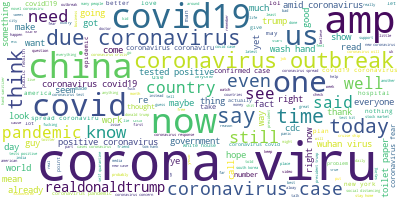

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(tweets_text)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Odds Ratio Calculation

In [ ]:
from scipy import stats
oddsratio, pvalue = stats.fisher_exact([[8, 2], [1, 5]])
print(oddsratio, pvalue)

## Empath

In [1]:
from empath import Empath
lexicon = Empath()

In [1]:
frames = ['social_media','trust','friends','help','body','office','dance','money','wedding',
          'domestic_work','sleep','medical_emergency','cold','hate','cheerfulness','aggression',
          'occupation','envy','anticipation','family','vacation','crime','attractive','masculine',
          'prison','health','pride','dispute','nervousness','government','weakness','horror',
          'swearing_terms','leisure','suffering','royalty','wealthy','tourism','furniture','school',
          'magic','beach','journalism','morning','banking','exercise','night','kill','blue_collar_job',
          'art','ridicule','play','computer','college','optimism','stealing','real_estate',
          'home','divine','sexual','fear','irritability','superhero','business','driving','pet',
          'childish','cooking','exasperation','religion','hipster','internet','surprise','reading',
          'worship','leader','independence','movement','noise','eating','medieval','zest','confusion',
          'water','sports','death','healing','legend','heroic','celebration','restaurant','violence',
          'programming','dominant_heirarchical','military','neglect','swimming','exotic','love',
          'hiking','communication','hearing','order','sympathy','hygiene','weather','anonymity',
          'ancient','deception','fabric','air_travel','fight','dominant_personality','music','vehicle',
          'politeness','toy','farming','meeting','war','speaking','listen','urban','shopping','disgust',
          'fire','tool','phone','gain','sound','injury','sailing','rage','science','work','appearance',
          'valuable','warmth','youth','sadness','fun','emotional','joy','affection','traveling','fashion',
          'ugliness','lust','shame','torment','economics','anger','politics','ship','clothing','car',
          'strength','technology','breaking','shape_and_size','power','white_collar_job','animal','party',
          'terrorism','smell','disappointment','poor','plant','pain','beauty','timidity','philosophy',
          'negotiate','negative_emotion','cleaning','messaging','competing','law','payment','achievement',
          'alcohol','liquid','feminine','weapon','children','monster','ocean','giving','contentment',
          'writing','rural','positive_emotion','musical']



In [62]:
from collections import Counter, defaultdict
hashtags = Counter()
hashtag_by_date = defaultdict(lambda: Counter())
for tw in tweets:
    date = tw[6]
    for tag in tw[12].split():
        tag = tag.lower()
        hashtags[tag] += 1
        
        hashtag_by_date[date][tag] += 1


In [57]:
hashtag_by_date['10'].most_common()[:100]

[('coronavirus', 2579),
 ('COVID19', 1578),
 ('Coronavirus', 618),
 ('COVID2019', 335),
 ('CoronavirusOutbreak', 270),
 ('COVIDー19', 204),
 ('covid19', 203),
 ('CoronaVirus', 174),
 ('CoronaVirusUpdate', 130),
 ('Trumpdemic', 93),
 ('COVID', 92),
 ('Covid19', 85),
 ('SmartNews', 84),
 ('China', 81),
 ('Trump', 75),
 ('WuhanVirus', 69),
 ('news', 53),
 ('Italy', 49),
 ('CDC', 46),
 ('Corona', 43),
 ('TrumpVirus', 43),
 ('CORONAVIRUS', 41),
 ('USA', 41),
 ('BREAKING', 38),
 ('FoxNews', 38),
 ('corona', 36),
 ('SARSCoV2', 35),
 ('MAGA', 34),
 ('TrumpCrash', 34),
 ('pandemic', 30),
 ('CoronavirusUSA', 29),
 ('covid', 28),
 ('TrumpRecession', 27),
 ('WuhanCoronavirus', 26),
 ('politics', 25),
 ('world', 25),
 ('virus', 25),
 ('marketcrash', 24),
 ('Wuhan', 23),
 ('CloseTheSchools', 22),
 ('Coachella', 22),
 ('TuesdayThoughts', 22),
 ('covid2019', 21),
 ('travel', 20),
 ('flu', 20),
 ('WashYourHands', 19),
 ('TuesdayMotivation', 19),
 ('TheBachelor', 19),
 ('health', 18),
 ('Iran', 18),
 ('h

In [63]:
common = {'coronavirus', 'covid19', 'covid-19', 'covidー19', 'covid', 'covid19us', 'coronavirusus', 'Covid19usa',
          'covid_19', 'coronaoutbreak', 'covid2019',
          'coronavirusupdate', 'coronavirusupdates', 'corona', 'coronavirusoutbreak', 'breaking', 'news'}

top50 = [x[0] for x in hashtags.most_common(100) if x[0] not in common]
top50

['socialdistancing',
 'china',
 'trump',
 'smartnews',
 'pandemic',
 'stayhome',
 'coronavirususa',
 'quarantinelife',
 'cdc',
 'trumpvirus',
 'foxnews',
 'coronaviruspandemic',
 'health',
 'stayathome',
 'flattenthecurve',
 'maga',
 'washyourhands',
 'quarantine',
 'trumpviruscoverup',
 'usa',
 'virus',
 'coronavirusseattle',
 'supertuesday',
 'iran',
 'coronapocalypse',
 'wuhan',
 'healthcare',
 'publichealth',
 'italy',
 'who',
 'sarscov2',
 'coronaalert',
 'travel',
 'lockdown',
 'coronaviruschallenge',
 'chinesevirus',
 'flu',
 'nyc',
 'business',
 'economy',
 'wuhanvirus',
 'stocks',
 'coronavid19',
 'fakenews',
 'politics',
 'trumpliesaboutcoronavirus',
 'stockmarket',
 'wuhancoronavirus',
 'covid19usa',
 'trumppandemic',
 'outbreak',
 'coronavirusnyc',
 'cpac2020',
 'california',
 'topbuzz',
 'seattle',
 'breakingnews',
 'coronvirus',
 'trump2020',
 'staysafe',
 'tech',
 'chinavirus',
 'pencedemic',
 'kag',
 'florida',
 'sxsw',
 'coronapocolypse',
 'us',
 'newyork',
 'coronovir

In [65]:
hashtags.most_common()[100:200]

[('cdnpoli', 421),
 ('panicbuying', 419),
 ('2019ncov', 412),
 ('fridaythoughts', 412),
 ('coronavirusireland', 403),
 ('trumpisanidiot', 392),
 ('coronavirustruth', 391),
 ('potus', 389),
 ('coronavirustexas', 388),
 ('feedly', 387),
 ('podcast', 384),
 ('auspol', 384),
 ('map', 382),
 ('technology', 377),
 ('remotework', 375),
 ('dumptrump2020', 374),
 ('handsanitizer', 371),
 ('tuesdaythoughts', 367),
 ('donaldtrump', 366),
 ('resist', 365),
 ('epidemic', 363),
 ('workfromhome', 362),
 ('amazon', 362),
 ('canada', 360),
 ('quarentinelife', 358),
 ('cnn', 354),
 ('coronavirusnewyork', 352),
 ('america', 349),
 ('coronaviruswashington', 343),
 ('fed', 340),
 ('hoax', 335),
 ('realestate', 323),
 ('coronalockdown', 321),
 ('music', 314),
 ('uk', 312),
 ('supplychain', 312),
 ('southkorea', 309),
 ('washington', 308),
 ('staysafestayhome', 307),
 ('fbr', 306),
 ('n95', 304),
 ('japan', 303),
 ('cybersecurity', 303),
 ('mentalhealth', 302),
 ('education', 302),
 ('masks', 301),
 ('social

In [2]:
tweets = []
with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        tweets.append(line.split(','))
#         text = line.split(',')[11]
#         if len(text) > 0:
#             tweets.append(text)

print(f"loaded {len(tweets)} tweets")

loaded 1022821 tweets


In [3]:
from sklearn.cluster import KMeans
import numpy as np

In [4]:
empath_ids = []
empath_data = []
with open('../data/tweets.0301-0331.usa.empath.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        data = line.split(',')
        empath_ids.append(data[0])        
        empath_data.append([float(x) for x in data[1:]])
empath_data = np.array(empath_data)
print(f"loaded {len(empath_data)} tweets")

loaded 36914 tweets


In [5]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(empath_data)

In [26]:
np.random.choice(np.arange(10), 3, replace=False)

array([1, 0, 8])

In [35]:
for i in range(len(kmeans.cluster_centers_)):
#     tweets_in_cluster = tweets[kmeans.labels_==i]
    idxs = np.where(kmeans.labels_==i)[0]
    print("\nCLUSTER {} ({})".format(i, len(idxs)))
    idxs = np.random.choice(idxs, 10, replace=False)
    
    
    top_frame_idx = np.argsort(kmeans.cluster_centers_[i])[::-1]
    print([frames[j] for j in top_frame_idx[:10]])
    print()


    for j in range(10):
        print('- ' + tweets[idxs[j]][11])
    


CLUSTER 0 (1805)
['programming', 'technology', 'internet', 'computer', 'school', 'office', 'negative_emotion', 'work', 'communication', 'science']

- In favour of football being suspended to contain Coronavirus until Jordan Henderson is fit again.
- @pattapee Really needed your mentality today.  I'd like to start the #SecretSocietyOfFartingCats  #Covid_19 small humor...
- It’s Too Late to Fight Coronavirus by Curbing U.S. Travel
- @AIR_CAV @DaveEverlasting "The China expert said the average regional Communist Party official is probably more accountable for his or her performance than the average U.K. member of Parliament..." Communism is better than Democracy!? NY MAG:
- Here Are 17 Ways the #Trump Administration Bungled Its #Coronavirus Response – Mother Jones #VoteBlueNoMatterWho2020 😁🌞💪 🌊
- people saying to me "don't worry  only people whose immune systems are already weak are in danger from coronavirus so there's no reason to be concerned" like I'm not a fucking person whose immun

In [7]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [30]:
pca_50 = PCA(n_components=30)
pca_result_50 = pca_50.fit_transform(empath_data)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.601242730827884


In [31]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 36914 samples in 0.127s...
[t-SNE] Computed neighbors for 36914 samples in 84.985s...
[t-SNE] Computed conditional probabilities for sample 1000 / 36914
[t-SNE] Computed conditional probabilities for sample 2000 / 36914
[t-SNE] Computed conditional probabilities for sample 3000 / 36914
[t-SNE] Computed conditional probabilities for sample 4000 / 36914
[t-SNE] Computed conditional probabilities for sample 5000 / 36914
[t-SNE] Computed conditional probabilities for sample 6000 / 36914
[t-SNE] Computed conditional probabilities for sample 7000 / 36914
[t-SNE] Computed conditional probabilities for sample 8000 / 36914
[t-SNE] Computed conditional probabilities for sample 9000 / 36914
[t-SNE] Computed conditional probabilities for sample 10000 / 36914
[t-SNE] Computed conditional probabilities for sample 11000 / 36914
[t-SNE] Computed conditional probabilities for sample 12000 / 36914
[t-SNE] Computed conditional probabilities for s

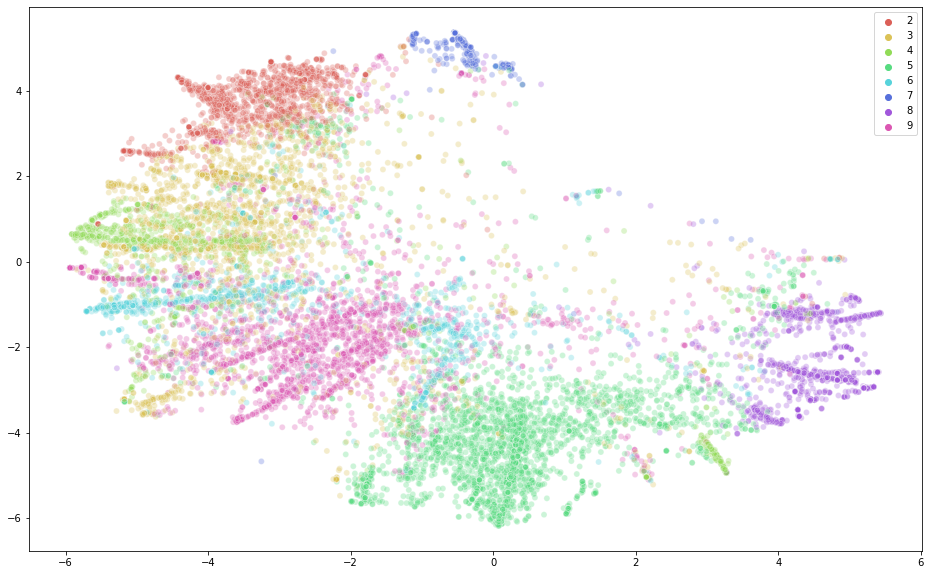

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16,10))

sns.scatterplot(
    x=tsne_results[kmeans.labels_>1,0],
    y=tsne_results[kmeans.labels_>1,1],
    hue=kmeans.labels_[kmeans.labels_>1],
    palette=sns.color_palette("hls", 8),
    legend="full",
    alpha=0.3
)

## LDA - sklearn

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [54]:
count_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
count_data = count_vectorizer.fit_transform(tweets_text[:10000])

In [55]:
count_data.shape

(10000, 10000)

In [57]:
count_data.sum(axis=0).max()

5204

In [58]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
amp coronavirus china pro covid19 war joebiden political social children

Topic #1:
coronavirus health covid19 hands minister just cruise state coachella ship

Topic #2:
coronavirus new covid19 amp health outbreak york china states spread

Topic #3:
coronavirus italy people million china 000 cases covid19 deaths virus

Topic #4:
coronavirus trump realdonaldtrump cdc covid corona people 19 amp china

Topic #5:
coronavirus covid 19 like just people corona china think got

Topic #6:
coronavirus flu china trump people covid19 need like covid 19

Topic #7:
corona virus end people covid say english 19 kill talk

Topic #8:
coronavirus don corona people know virus just covid 19 test

Topic #9:
coronavirus cases covid 19 positive confirmed uk new county china


## LDA - Gensim

Using anlp code from https://github.com/dbamman/anlp19/blob/master/17.clustering/TopicModeling_noMallet_TODO.ipynb

In [6]:
import gensim
from gensim import corpora
import nltk
import re

In [2]:
# twitter-aware otkenizer - keeps user handles intact
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = {k:1 for k in stopwords.words('english')}
stop_words=list(stop_words.keys())

def filter(word, stopwords):
    
    """ Function to exclude words from a text """
    
    # no stopwords
    if word in stopwords:
        return False
    
    # has to contain at least one letter
    if re.search("[A-Za-z]", word) is not None:
        return True
    
    return False

def tokenize(tweet):
    toks = tweet_tokenizer.tokenize(tweet)
    return [t for t in toks if filter(t, stop_words)]
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashabelyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
tweets = []
tweets_text = []
with open('../data/tweets.0301-0331.usa.csv', 'r') as f:
    for line in f:
        if line.startswith('tweetId'):
            continue
        
        data = line.split(',')
        tweets.append(data)
        
        text = data[11]
        if len(text) > 0:
            tweets_text.append(text)

print(f"loaded {len(tweets)} tweets")

loaded 1022821 tweets


In [17]:
data = [tokenize(tweet) for tweet in tweets_text[:10000]]

In [19]:
# Create vocab from data; restrict vocab to only the top 10K terms that show up in at least 5 documents 
# and no more than 50% of all documents

dictionary = corpora.Dictionary(data)
dictionary.filter_extremes(no_below=100, no_above=.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data]

In [20]:
num_topics=10
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           passes=10,
                                           alpha='auto')

We can get a sense of what the topics are by printing the top 10 words with highest $P(word \mid topic)$ for each topic

In [21]:
for i in range(num_topics):
    print()
    print(' '.join([term for term, freq in lda_model.show_topic(i, topn=15)]))


Trump Coronavirus @realDonaldTrump What To You Time Is He money Why Are But The That

CDC We help response #coronavirus #COVID19 testing #Covid_19 need The face @CDCgov My Trump #CoronaVirus

I coronavirus get going know would think I'm even people see still getting information want

cases new coronavirus New County confirmed In case first York November deaths said officials spread

coronavirus like people #COVIDー19 This hands work us really hand one time way If go

COVID #coronavirus The A news coronavirus positive test tested two people next may risk much

virus corona Corona No flu Virus Die The vaccine people year infected right one like

coronavirus due health spread S U Bond public James back concerns travel stop The President

China coronavirus billion emergency outbreak deal funding Italy It And world home close US Chinese

Coronavirus coronavirus The #Coronavirus rate global death says How state fears release News amid House


Another way of understanding topics is to print out the documents that have the highest topic representation -- i.e., for a given topic $k$, the documents with highest $P(topic=k | document)$. How much do the documents listed here align with your understanding of the topics?

In [77]:
import operator
topic_model=lda_model 

topic_docs=[]
for i in range(num_topics):
    topic_docs.append({})
for doc_id in range(len(corpus)):
    doc_topics=topic_model.get_document_topics(corpus[doc_id])
    for topic_num, topic_prob in doc_topics:
        topic_docs[topic_num][doc_id]=topic_prob

for i in range(num_topics):
    print("%s\n" % ' '.join([term for term, freq in topic_model.show_topic(i, topn=10)]))
    sorted_x = sorted(topic_docs[i].items(), key=operator.itemgetter(1), reverse=True)
    for k, v in sorted_x[:5]:
        print("%s\t%.3f\t%s" % (i,v,doc_names[k]))
    print()

them end kill talk ok coachella soon n send for



NameError: name 'doc_names' is not defined